#Πρώτη εργαστηριακή άσκηση
##Αλεξανδρόπουλος Σταμάτης (03117060) , Γκότση Πολυτίμη-Άννα (03117201)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import sys
# sys.path.insert(0,'/content/drive/MyDrive/Colab Notebooks/pattern_rec')
sys.path.insert(0,'/content/drive/MyDrive/pattern_rec')
import lib
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.ensemble import VotingClassifier,BaggingClassifier
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import pandas as pd
import torch.nn.functional as F


##Βήμα 1

In [ ]:
# f = open("/content/drive/My Drive/Colab Notebooks/pattern_rec/data/test.txt", "r")     # read test data
f = open("/content/drive/My Drive/pattern_rec/data/test.txt", "r")     # read test data
content=f.readlines()
test_array = np.array([line.split() for line in content] )                             # convert test data to array
# f = open("/content/drive/My Drive/Colab Notebooks/pattern_rec/data/train.txt", "r")    # read train data
f = open("/content/drive/My Drive/pattern_rec/data/train.txt", "r")    # read train data
content=f.readlines()
train_array = np.array([line.split() for line in content])                             # convert train data to array

In [ ]:
y_train=train_array[:,:1]               # get train labels
y_train=y_train.flatten()               # convert to 1d
y_train=y_train.astype(np.float64)      # convert strings to floats
X_train=train_array[:,1:]               # get features of train data
X_train=X_train.astype(np.float64)      # convert strings to floats

y_test=test_array[:,:1]                 # get test labels
y_test=y_test.flatten()                 # convert to  1d
y_test=y_test.astype(np.float64)        # convert strings to floats
X_test=test_array[:,1:]                 # get features of test data
X_test=X_test.astype(np.float64)        # convert strings to floats

print('Dimensions of train labels array:', y_train.shape)
print('Dimensions of train samples array:', X_train.shape)
print('Dimensions of test labels array:', y_test.shape)
print('Dimensions of test samples array:', X_test.shape)

Dimensions of train labels array: (7291,)
Dimensions of train samples array: (7291, 256)
Dimensions of test labels array: (2007,)
Dimensions of test samples array: (2007, 256)


##Βήμα 2

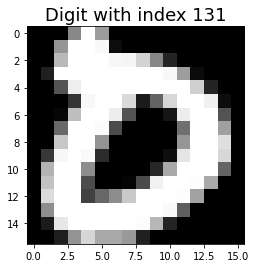

In [ ]:
lib.show_sample(X_train,130)        # plot digit at index 131 of train data

In [ ]:
print('Digit is:', int(y_train[130]))

Digit is: 0


##Βήμα 3

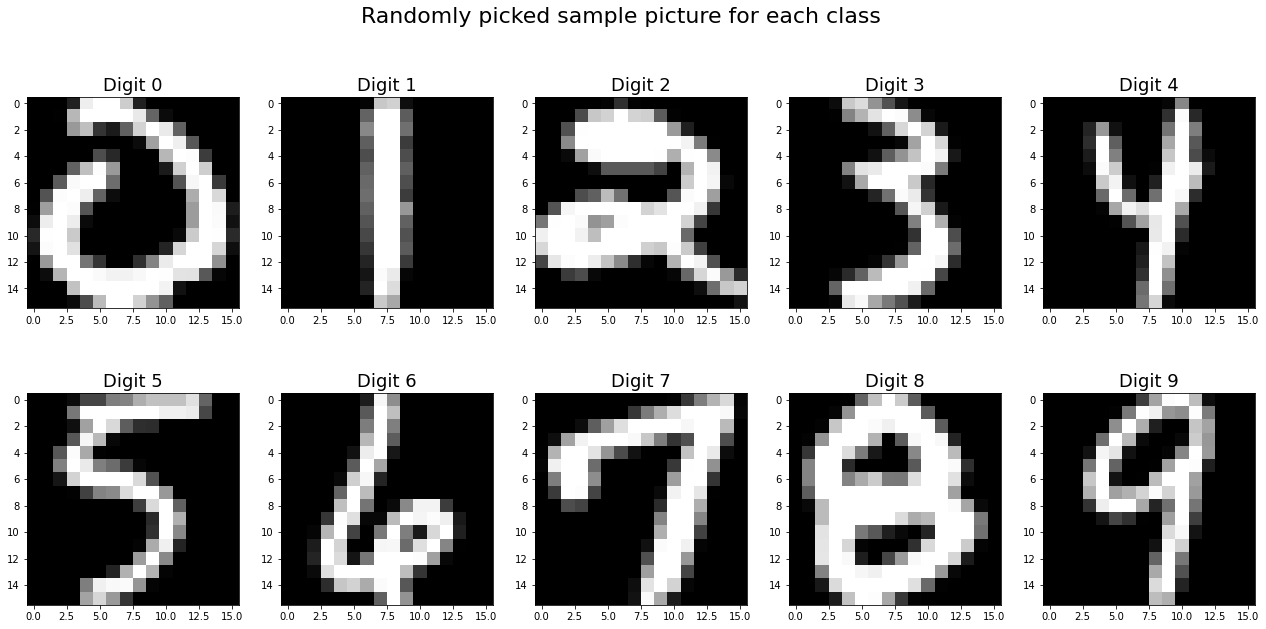

In [ ]:
lib.plot_digits_samples(X_train,y_train)   # plot one sample (randomly picked) for each of the digits 0-9

##Βήμα 4

In [ ]:
mean_zero=lib.digit_mean_at_pixel(X_train,y_train,0)  # calculate mean value for pixel (10,10) (default) for digit 0 , using the train data
print("Mean value is:",mean_zero)

Mean value is: -0.9272646566164154


##Βήμα 5

In [ ]:
mean_variance=lib.digit_variance_at_pixel(X_train,y_train,0)  # calculate variance for pixel (10,10) (default) for digit 0 , using the train data
print("Variance value is:",mean_variance)

Variance value is: 0.08399490726614352


##Βήμα 6

In [ ]:
zero_mean_values=lib.digit_mean(X_train,y_train,0)            # calculate mean value for all features of digit 0
zero_variance_values=lib.digit_variance(X_train,y_train,0)    # calculate variance for all features of digit 0

In [ ]:
print('Mean values for digit 0 are: ',zero_mean_values)

Mean values for digit 0 are:  [-0.99862814 -0.99539782 -0.98492295 -0.94125126 -0.83334255 -0.57142295
 -0.13158459  0.15260804  0.04628392 -0.35370101 -0.74124874 -0.92091625
 -0.98502513 -0.99718258 -0.99993467 -1.         -0.99823451 -0.99346566
 -0.94997069 -0.81149414 -0.48957538  0.06171608  0.5263928   0.6825
  0.63088945  0.39957621 -0.04891709 -0.57936348 -0.87249162 -0.96911139
 -0.99679983 -0.99999497 -0.99668174 -0.9728727  -0.86339531 -0.56290285
 -0.05700168  0.43772194  0.6278526   0.61645645  0.5500134   0.51951173
  0.37973953 -0.06139782 -0.56568928 -0.87724791 -0.97848995 -0.99811474
 -0.99374539 -0.93143049 -0.68924623 -0.21849832  0.29654858  0.5375134
  0.44771859  0.21163149  0.0910134   0.21372362  0.39326382  0.26515327
 -0.17200921 -0.64877387 -0.92078308 -0.99405025 -0.97799246 -0.82162228
 -0.41924121  0.09449414  0.46405611  0.44884757  0.13969012 -0.18907538
 -0.39019849 -0.23883166  0.11324456  0.3130067   0.12591374 -0.3365402
 -0.76123116 -0.97002764 -0

In [ ]:
print('Variance values for digit 0 are: ',zero_variance_values)

Variance values for digit 0 are:  [2.24710553e-03 6.61218108e-03 1.96070435e-02 6.29539251e-02
 1.80517711e-01 3.72425688e-01 5.32129066e-01 5.38652584e-01
 5.63057850e-01 4.58004391e-01 2.36125820e-01 8.27468429e-02
 1.21968225e-02 2.34697418e-03 2.25054864e-06 0.00000000e+00
 2.64590137e-03 6.10843679e-03 5.44937032e-02 2.28891036e-01
 4.99957965e-01 6.44135421e-01 4.85502183e-01 3.52813400e-01
 3.92387709e-01 5.70234363e-01 6.52718455e-01 4.13231133e-01
 1.49140835e-01 3.35148417e-02 2.23546619e-03 3.01507538e-08
 5.20404783e-03 3.14306644e-02 1.64857981e-01 4.76595199e-01
 6.88789851e-01 5.41577379e-01 3.90362785e-01 3.88269588e-01
 4.51799131e-01 4.54445439e-01 5.59844163e-01 6.76945537e-01
 4.56356382e-01 1.47290519e-01 2.15924446e-02 1.55355179e-03
 4.14597368e-03 8.32034943e-02 3.53123478e-01 6.88346336e-01
 6.41068459e-01 4.74419658e-01 5.60078092e-01 6.88158796e-01
 7.10076394e-01 6.50761459e-01 5.17683527e-01 6.14311813e-01
 6.92130527e-01 3.87860819e-01 9.27878817e-02 5.121

##Βήμα 7

Text(0.5, 1.0, 'Digit zero using mean values')

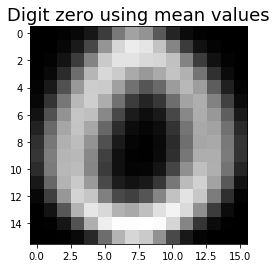

In [ ]:
plt.imshow(np.reshape(zero_mean_values,(16,16)),cmap='gray')  # plot digit 0 using mean values of features
plt.title('Digit zero using mean values', fontsize=18)

##Βήμα 8

Text(0.5, 1.0, 'Digit zero using variance values')

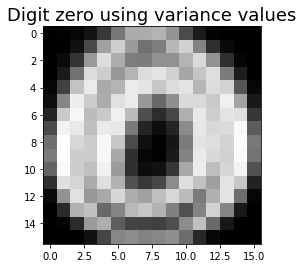

In [ ]:
plt.imshow(np.reshape(zero_variance_values,(16,16)),cmap='gray')   # plot digit 0 using variance values of features
plt.title('Digit zero using variance values', fontsize=18)

##Βήμα 9

In [ ]:
mean_values=np.zeros((10,256))                                               # table that will have mean values for all features of digit i in row i
variance_values=np.zeros((10,256))                                           # table that will have variance values for all features of digit i in row i

for digit in range (0,10):
  mean_values[digit,:]=lib.digit_mean(X_train,y_train,digit)
  variance_values[digit,:]=lib.digit_variance(X_train,y_train,digit)

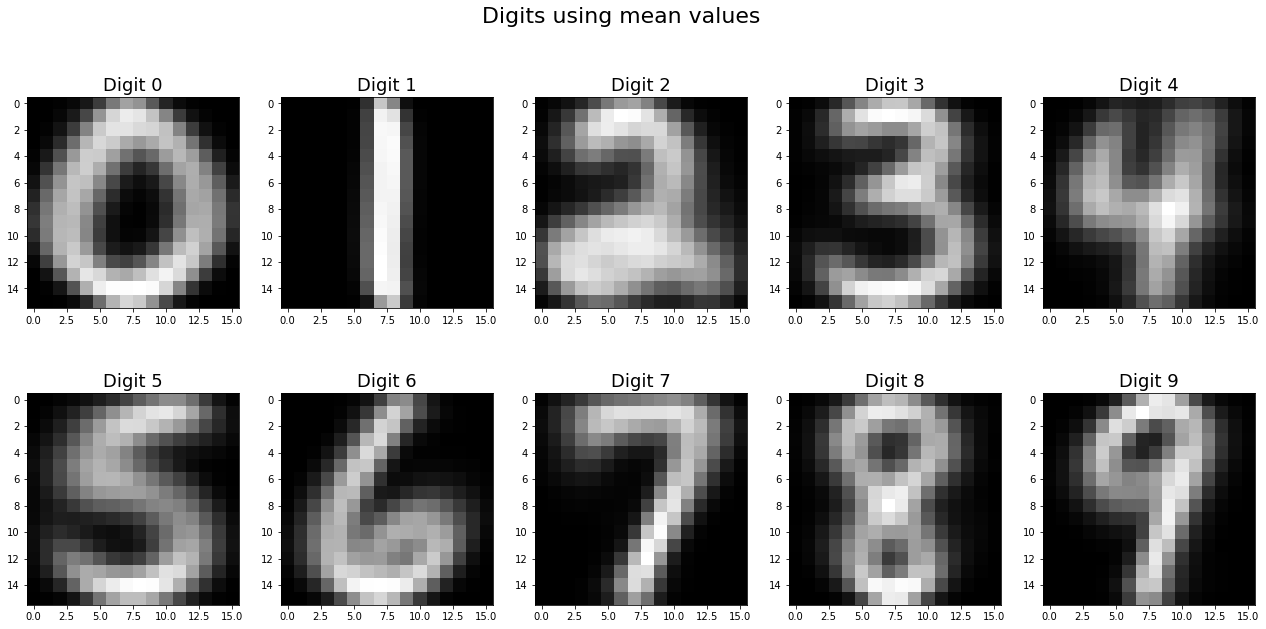

In [ ]:
fig=plt.figure(figsize=(22,10))
fig.suptitle('Digits using mean values', fontsize=22)
for i in range(0,10):               
  ax=fig.add_subplot(2,5,i+1)                                       
  ax.imshow(np.reshape(mean_values[i],(16,16)),cmap='gray')                 # plot each digit using the mean values for all its features
  plt.title('Digit {}'.format(i), fontsize=18)

##Bήμα 10

In [ ]:
prediction=lib.euclidean_distance_classifier(X_test[100,:],mean_values)   # get prediction of euclidean classiffier for test sample with index 101, regarding which digit it is
print("Prediction class is:",prediction)          
print("Actual class is:", int(y_test[100]))
if (prediction==int(y_test[100])):
  print("Prediction is correct.")
else:
  print("Prediction is incorrect.")

Prediction class is: 0
Actual class is: 0
Prediction is correct.


##Bήμα 11

α)

In [ ]:
predictions=lib.euclidean_distance_classifier(X_test,mean_values)  # get predictions of euclidean classiffier () for test data, predictions table holds at index i the prediction about which class sample i belongs to

β)

In [ ]:
percentage=np.sum(predictions==y_test)/len(y_test)            # calculate percentage of correct predictions for test data
print("Success rate is:", percentage)

Success rate is: 0.8141504733432985


##Βήμα 12

In [ ]:
classifier=lib.EuclideanDistanceClassifier()                  # initialize an instance of a scikit-learn euclidean distance classifier
classifier.fit(X_train,y_train)                               # train classifier
print("Success rate is:",classifier.score(X_test,y_test))     # print success rate of classifier for test data

Success rate is: 0.8141504733432985


##Βήμα 13

α)

In [ ]:
score=lib.evaluate_classifier(lib.EuclideanDistanceClassifier(), X_train, y_train)        # calculate mean score of k-fold cross-validation on all data

Scores with 5-fold cross-validation are: [0.84921179 0.85116598 0.84567901 0.84910837 0.84773663]


In [ ]:
print('Mean score with 5-fold cross-validation is:', score)

Mean score with 5-fold cross-validation is: 0.8485803550358166


β)

In [ ]:
pca = PCA(n_components=2)                                                                                                     # in order to plot the desicion regions we will use PCA to reduce dimensionality (256 features --> 2 features)
pca_test  = pca.fit_transform(X_train)                                                                                        # adapt data to reduced demensionality keeping 2 principal components (2 features)
print("First component contains {:.2f}% of the total information.".format((100*pca.explained_variance_ratio_[0])))
print("Second component contains {:.2f}% of the total information.".format( (100*pca.explained_variance_ratio_[1])))
print("The 2 components combined contain {:.2f}% of the total information.".format((100*pca.explained_variance_ratio_[0])+(100*pca.explained_variance_ratio_[1])) )

First component contains 17.88% of the total information.
Second component contains 8.97% of the total information.
The 2 components combined contain 26.85% of the total information.


In [ ]:
def plot_clf(clf, X, y, with_samples=True):                                                                                  # function that plots decision surface of classifier clf, for feature table X and label table y
    
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(1,1,1) 
    X0, X1 = X[:, 0], X[:, 1]                                                                                                # X0 will keep values of the one principal component and X1 of the other
    classes = sorted(set(y))                                                                                                 # get distinct labels of classes
    colors = ['peru', 'maroon', 'silver', 'tomato', 'lightgreen', 'orange', 'bisque', 'forestgreen', 'violet', 'lightpink']  # each color will represent a different digit
    
    x_min, x_max = X0.min() - 1, X0.max() + 1                                                                                # min and max value for x axis
    y_min, y_max = X1.min() - 1, X1.max() + 1                                                                                # min and max value for y axis
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.05))                                        # return coordinate matrices from coordinate vectors of grid 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])              
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8,levels=11)                                                  # draw contours for decision regions, levels: determines the number and positions of the contour lines / regions.

    if (with_samples):
      for i in range (0,len(classes)):                                                                                       # draw scatter plot for the 2 chosen features by PCA, for all the samples of each digit 
        ax.scatter(X0[y==i],X1[y==i],c=colors[i],label=int(classes[i]),s=60,alpha=0.9,edgecolors='k')
    
    ax.set_ylabel('PCA component 2')
    ax.set_xlabel('PCA component 1')
    if (with_samples):
      ax.set_title('Decision surface of Euclidean Distance Classifier and samples', fontsize=18)
    else:
      ax.set_title('Decision surface of Euclidean Distance Classifier', fontsize=18)
    ax.set_xticks(())
    ax.set_yticks(())
    if (with_samples):
      ax.legend()
    else:
      col = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in out.collections]  #create proxy artists to make the legend
      ax.legend(col,{int(i) for i in classes})
    plt.show()


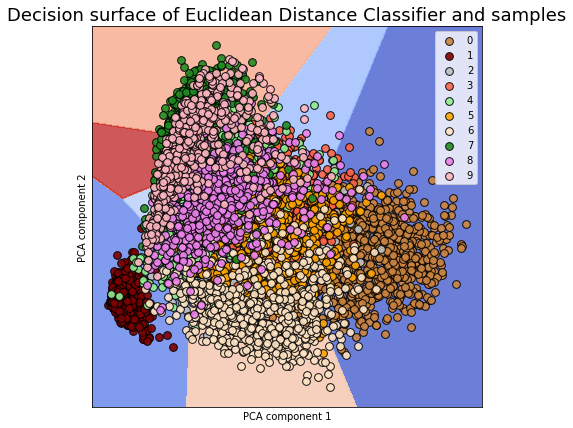

In [ ]:
clf = lib.EuclideanDistanceClassifier()           # initialize an euclidean distance classifier
pca = PCA(n_components=2)                         # set a PCA with 2 principal components
pca_train  = pca.fit_transform(X_train)           # adapt data to reduced demensionality keeping 2 principal components (2 features)
clf.fit(pca_train, y_train)                       # train classifier for train data
plot_clf(clf, pca_train, y_train)                 # call function to plot desicion surface and train data

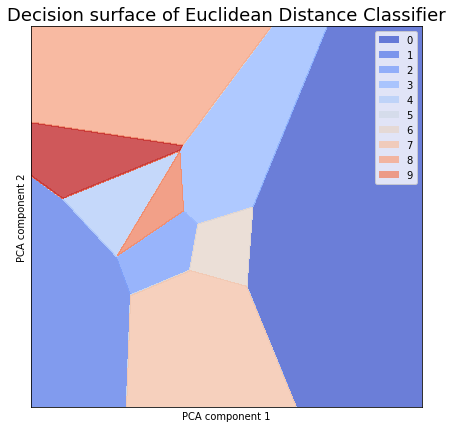

In [ ]:
plot_clf(clf, pca_train, y_train, False)           # call function to plot desicion surface without plotting train data

γ)

In [ ]:
train_sizes, train_scores, test_scores =learning_curve(lib.EuclideanDistanceClassifier(),X_train, y_train, cv=5, n_jobs=-1, shuffle=True)   # calculate learning curve for euclidean distance classifier using train data, set cross validation to 5 fold, n_jobs set to use all processors, shuffle=True for randomness in choice of training data

In [ ]:
print("Train sizes are: ")
print(train_sizes)
print("Train scores are: ")
print(train_scores)
print("Test scores are:")
print(test_scores)

Train sizes are: 
[ 583 1895 3207 4519 5832]
Train scores are: 
[[0.87821612 0.84734134 0.86620926 0.84391081 0.88164666]
 [0.8474934  0.84116095 0.85382586 0.85540897 0.8591029 ]
 [0.84752105 0.84658559 0.85063923 0.85375741 0.8553165 ]
 [0.84797522 0.85107325 0.85107325 0.85240097 0.85129453]
 [0.84910837 0.85202332 0.85322359 0.85048011 0.85219479]]
Test scores are:
[[0.85332419 0.83744856 0.83470508 0.84087791 0.82921811]
 [0.85263879 0.84087791 0.84567901 0.85459534 0.84156379]
 [0.8553804  0.8388203  0.8436214  0.85322359 0.84156379]
 [0.854695   0.83950617 0.84773663 0.85802469 0.8388203 ]
 [0.8574366  0.84224966 0.8436214  0.85596708 0.84430727]]


Text(0.5, 0, 'Number of training samples')

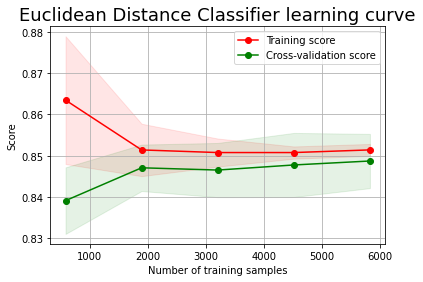

In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)                                # compute mean value of scores for train set
train_scores_std = np.std(train_scores, axis=1)                                  # compute standard deviation for train set 
test_scores_mean = np.mean(test_scores, axis=1)                                  # compute mean value of scores for test set
test_scores_std = np.std(test_scores, axis=1)                                    # compute standard deviation for train set 

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")   # fill area between mean+std, mean-std
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.legend(loc="best")
plt.title("Euclidean Distance Classifier learning curve", fontsize=18)
plt.ylabel("Score")
plt.xlabel("Number of training samples")

## Βήμα 14

The apriori probability of class 0 is : 16.376%
The apriori probability of class 1 is : 13.784%
The apriori probability of class 2 is : 10.026%
The apriori probability of class 3 is : 9.025%
The apriori probability of class 4 is : 8.943%
The apriori probability of class 5 is : 7.626%
The apriori probability of class 6 is : 9.107%
The apriori probability of class 7 is : 8.847%
The apriori probability of class 8 is : 7.434%
The apriori probability of class 9 is : 8.833%


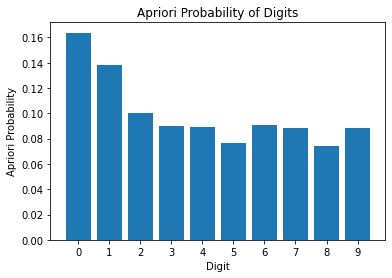

In [ ]:
priors=lib.calculate_priors(X_train,y_train)            # calculate the apriori probability of each digit

for i in range(10):
  print("The apriori probability of class " + str(i) + " is : "+ str(round(priors[i]*100,3)) +"%")

fig = plt.figure()
digits=np.arange(10)
plt.bar(digits, priors)
plt.xticks(digits,digits)
plt.title('Apriori Probability of Digits')
plt.xlabel('Digit')
plt.ylabel('Apriori Probability')
plt.show()


## Βήμα 15 

α)

In [ ]:
param_grid = {'smoothing': [0.00001, 0.00005, 0.0001, 0.0003, 0.0005,0.0008]}                   # options for smoothing parameter for Naive Bayes classifier
grid = GridSearchCV(lib.CustomNBClassifier(), param_grid, refit = True,  cv = 5, n_jobs = -1)   # initialize GridSearchCV instance
grid.fit(X_train, y_train)                                                                      # run fit with all sets of parameters

print("Best parameter for Naive Bayes Classifier is : " +str(grid.best_params_))                # print best set of parameters

Best parameter for Naive Bayes Classifier is : {'smoothing': 0.0008}


In [ ]:
classifier=lib.CustomNBClassifier(0.0008)               # create Naive Bayes Classifier instance
classifier.fit(X_train,y_train)                   # train classifier
predictions=classifier.predict(X_test)            # get predictions for test set
print("Predicted labels are: ",predictions)

Predicted labels are:  [9 2 3 ... 4 0 1]


β)

In [ ]:
score=classifier.score(X_test,y_test)             # calculate accuracy of classifier
print("Custom Naive Bayes Classifier has an accuracy of: ", score)
print("Custom Naive Bayes Classifier with 5 cross-validation has a mean accuracy of: ",lib.evaluate_custom_nb_classifier(X_train,y_train))

Custom Naive Bayes Classifier has an accuracy of:  0.8126557050323866
Scores with 5-fold cross-validation are: [0.82179575 0.81618656 0.80589849 0.7654321  0.79835391]
Custom Naive Bayes Classifier with 5 cross-validation has a mean accuracy of:  0.8015333613510954


γ)

In [ ]:
param_grid = {'var_smoothing': [0.00001, 0.00005, 0.0001, 0.0003, 0.0005,0.0008]}               # options for smoothing parameter for Naive Bayes classifier
grid = GridSearchCV(GaussianNB(), param_grid, refit = True,  cv = 5, n_jobs = -1)               # initialize GridSearchCV instance
grid.fit(X_train, y_train)                                                                      # run fit with all sets of parameters

print("Best parameter for Naive Bayes Classifier is : " +str(grid.best_params_))                # print best set of parameters

Best parameter for Naive Bayes Classifier is : {'var_smoothing': 0.0008}


In [ ]:
clf = GaussianNB(var_smoothing=0.0008)           # Create scikit-learn Naive Bayes classifier instance
clf.fit(X_train, y_train)                         # train classifier
score=clf.score(X_test,y_test)                    # calculate accuracy of classifier
print("Scikit-learn Naive Bayes Classifier has an accuracy of: ", score)
print("Scikit-learn Naive Bayes Classifier with 5 cross validation has an accuracy of: ", lib.evaluate_sklearn_nb_classifier(X_train,y_train))

Scikit-learn Naive Bayes Classifier has an accuracy of:  0.7713004484304933
Scores with 5-fold cross-validation are: [0.80397533 0.79355281 0.77572016 0.74005487 0.77846365]
Scikit-learn Naive Bayes Classifier with 5 cross validation has an accuracy of:  0.7783533641528717


##Βήμα 16

α)

In [ ]:
param_grid = {'smoothing': [0.00001, 0.00005, 0.0001, 0.0003, 0.0005,0.0008], 'use_unit_variance' : [True]}     # options for smoothing parameter for Naive Bayes classifier
grid = GridSearchCV(lib.CustomNBClassifier(True), param_grid, refit = True,  cv = 5, n_jobs = -1)               # initialize GridSearchCV instance
grid.fit(X_train, y_train)                                                                                      # run fit with all sets of parameters

print("Best parameter for Naive Bayes Classifier is : " +str(grid.best_params_))                                # print best set of parameters

Best parameter for Naive Bayes Classifier is : {'smoothing': 1e-05, 'use_unit_variance': True}


In [ ]:
classifier=lib.CustomNBClassifier(True, smoothing=0.00001)     # create Naive Bayes Classifier instance, with all variances equal to one
classifier.fit(X_train,y_train)                                # train classifier
predictions=classifier.predict(X_test)                         # get predictions for test set
print("Predicted labels are: ",predictions)

Predicted labels are:  [9 2 3 ... 4 0 1]


β)

In [ ]:
score=classifier.score(X_test,y_test)             # calculate accuracy of classifier
print("Naive Bayes Classifier with unit variances has an accuracy of: ", score)
print("Naive Bayes Classifier with unit variances has an  5-fold accuracy of: ",lib.evaluate_classifier(classifier,X_train,y_train,5))

Naive Bayes Classifier with unit variances has an accuracy of:  0.8126557050323866
Scores with 5-fold cross-validation are: [0.84989719 0.85048011 0.84705075 0.84979424 0.84430727]
Naive Bayes Classifier with unit variances has an  5-fold accuracy of:  0.848305912593984


##Βήμα 17

### SVM Classifier

####Linear SVM Classifier

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10,20],'gamma':['scale','auto'],'kernel': ['linear']}   # options for parameters for linear SVM classifier
grid = GridSearchCV(svm.SVC(), param_grid, refit = True,  cv = 5, n_jobs = -1)            # initialize GridSearchCV instance
grid.fit(X_train, y_train)                                                                # run fit with all sets of parameters

print("Best parameters for linear SVM Classifier are : " +str(grid.best_params_))         # print best set of parameters


Best parameters for SVM model are : {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
#Evaluation of linear SVM model
score=lib.evaluate_linear_svm_classifier(X_train,y_train)
print('Mean score of linear SVM classifier with 5-fold cross-validation is: ',score)

Scores with 5-fold cross-validation are: [0.96093215 0.95747599 0.96227709 0.96433471 0.96227709]
Mean score of linear SVM classifier with 5-fold cross-validation is:  0.9614594057413848


Text(0.5, 0, 'Number of training samples')

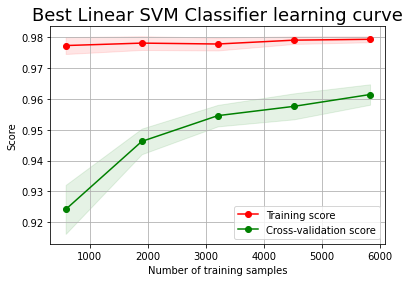

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(C= 0.01, gamma= 'scale', kernel= 'linear'), X_train,y_train, cv = 5,n_jobs = -1,shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)                                # compute mean value of scores for train set
train_scores_std = np.std(train_scores, axis=1)                                  # compute standard deviation for train set 
test_scores_mean = np.mean(test_scores, axis=1)                                  # compute mean value of scores for test set
test_scores_std = np.std(test_scores, axis=1)                                    # compute standard deviation for train set 

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")   # fill area between mean+std, mean-std
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.legend(loc="best")
plt.title("Best Linear SVM Classifier learning curve", fontsize=18)
plt.ylabel("Score")
plt.xlabel("Number of training samples")

####RBF SVM Classifier

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10,20],'gamma':['scale','auto'],'kernel': ['rbf']} # options for parameters for rbf SVM classifier
grid = GridSearchCV(svm.SVC(), param_grid, refit = True,  cv = 5, n_jobs = -1)       # initialize GridSearchCV instance
grid.fit(X_train, y_train)                                                            # run fit with all sets of parameters

print("Best parameters for linear SVM Classifier are : " +str(grid.best_params_))    # print best set of parameters


Best parameters for linear SVM Classifier are : {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
#Evaluation of rbf SVM model
score=lib.evaluate_rbf_svm_classifier(X_train,y_train)
print('Mean score of rbf SVM classifier with 5-fold cross-validation is: ',score)

Scores with 5-fold cross-validation are: [0.98355038 0.97736626 0.98010974 0.98148148 0.98148148]
Mean score of rbf SVM classifier with 5-fold cross-validation is:  0.9807978668893045


Text(0.5, 0, 'Number of training samples')

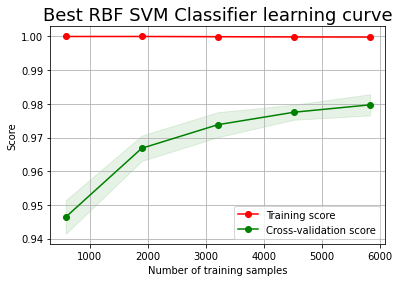

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(C= 10, gamma= 'scale', kernel= 'rbf'), X_train, y_train, cv = 5,n_jobs = -1,shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)                                # compute mean value of scores for train set
train_scores_std = np.std(train_scores, axis=1)                                  # compute standard deviation for train set 
test_scores_mean = np.mean(test_scores, axis=1)                                  # compute mean value of scores for test set
test_scores_std = np.std(test_scores, axis=1)                                    # compute standard deviation for train set 

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")   # fill area between mean+std, mean-std
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.legend(loc="best")
plt.title("Best RBF SVM Classifier learning curve", fontsize=18)
plt.ylabel("Score")
plt.xlabel("Number of training samples")

####Best SVM Classifier

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10],'gamma':['scale','auto'],'kernel': ['linear','rbf', 'poly','sigmoid']}  # options for parameters for  SVM classifier
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True,  cv = 5, n_jobs = -1)            # initialize GridSearchCV instance
grid.fit(X_train, y_train)                                                                # run fit with all sets of parameters

print("Best parameters for SVM model are : " +str(grid.best_params_))                    # print best set of parameters

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Best parameters for SVM model are : {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}


In [ ]:
#Evaluation of SVM model
score=lib.evaluate_svm_classifier(X_train,y_train)    #####ΓΙΑΤΙ ΒΓΑΙΝΕΙ ΧΑΜΗΛΟΤΕΡΟ ΑΠΟ ΤΟ ΑΠΟ ΠΑΝΩ
print('Mean score of polynomial SVM classifier with 5-fold cross-validation is: ',score)

Scores with 5-fold cross-validation are: [0.98423578 0.97805213 0.978738   0.98010974 0.98285322]
Mean score of polynomial SVM classifier with 5-fold cross-validation is:  0.9807977728699685


Text(0.5, 0, 'Number of training samples')

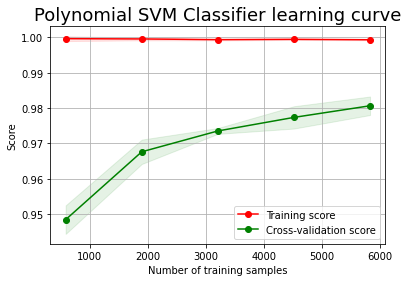

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(C= 10, gamma= 'auto', kernel= 'poly'), X_train, y_train, cv = 5,n_jobs = -1,shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)                                # compute mean value of scores for train set
train_scores_std = np.std(train_scores, axis=1)                                  # compute standard deviation for train set 
test_scores_mean = np.mean(test_scores, axis=1)                                  # compute mean value of scores for test set
test_scores_std = np.std(test_scores, axis=1)                                    # compute standard deviation for train set 

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")   # fill area between mean+std, mean-std
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.legend(loc="best")
plt.title("Polynomial SVM Classifier learning curve", fontsize=18)
plt.ylabel("Score")
plt.xlabel("Number of training samples")


### Nearest Neighbors Classifier

In [ ]:
param_grid = {'n_neighbors':[2,3,4,5,6,7,8], 'weights': ['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree']}   # options for parameters for KNN classifier
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True,  cv = 5, n_jobs = -1)   # initialize GridSearchCV instance
grid.fit(X_train, y_train)                                                                    # run fit with all sets of parameters

print("Best parameters for Nearest Neighbors Classifier are : " +str(grid.best_params_))      # print best set of parameters


Best parameters for Nearest Neighbors Classifier are : {'algorithm': 'auto', 'n_neighbors': 2, 'weights': 'distance'}


In [ ]:
score=lib.evaluate_knn_classifier(X_train,y_train)            # evaluate Nearest Neighbors classifier (using best set of parameters)
print("Mean score of KNN classifier with 5-fold cross-validation is: ",score)

Scores with 5-fold cross-validation are: [0.96572995 0.96639232 0.96707819 0.96776406 0.96982167]
Mean score of KNN classifier with 5-fold cross-validation is:  0.9673572386897089


Text(0.5, 0, 'Number of training samples')

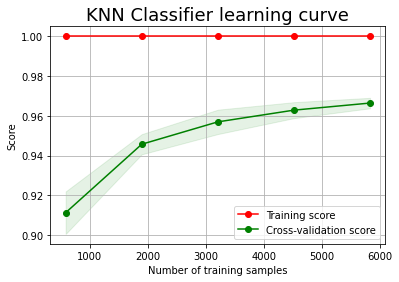

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=2,weights='distance',algorithm='auto'), X_train, y_train, cv = 5,n_jobs = -1,shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)                                # compute mean value of scores for train set
train_scores_std = np.std(train_scores, axis=1)                                  # compute standard deviation for train set 
test_scores_mean = np.mean(test_scores, axis=1)                                  # compute mean value of scores for test set
test_scores_std = np.std(test_scores, axis=1)                                    # compute standard deviation for train set 

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")   # fill area between mean+std, mean-std
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.legend(loc="best")
plt.title("KNN Classifier learning curve", fontsize=18)
plt.ylabel("Score")
plt.xlabel("Number of training samples")

###Naive Bayes

####Custom

In [ ]:
score=lib.evaluate_custom_nb_classifier(X_train,y_train)
print("Mean score of Custom Naive Bayes Classifier with 5 cross-validation: ",score)

Scores with 5-fold cross-validation are: [0.82179575 0.81618656 0.80589849 0.7654321  0.79835391]
Mean score of Custom Naive Bayes Classifier with 5 cross-validation:  0.8015333613510954


Text(0.5, 0, 'Number of training samples')

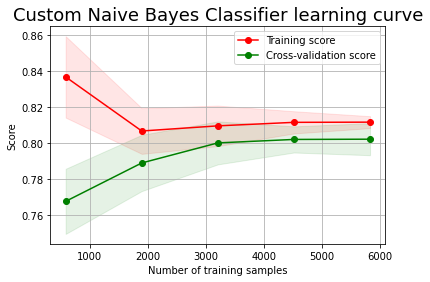

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(lib.CustomNBClassifier(smoothing=0.0008), X_train, y_train, cv = 5,n_jobs = -1,shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)                                # compute mean value of scores for train set
train_scores_std = np.std(train_scores, axis=1)                                  # compute standard deviation for train set 
test_scores_mean = np.mean(test_scores, axis=1)                                  # compute mean value of scores for test set
test_scores_std = np.std(test_scores, axis=1)                                    # compute standard deviation for train set 

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")   # fill area between mean+std, mean-std
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.legend(loc="best")
plt.title("Custom Naive Bayes Classifier learning curve", fontsize=18)
plt.ylabel("Score")
plt.xlabel("Number of training samples")

####Scikit-learn implementation

In [ ]:
score=lib.evaluate_sklearn_nb_classifier(X_train,y_train)
print("Mean score of scikit-learn Naive Bayes Classifier with 5 cross-validation: ",score)

Scores with 5-fold cross-validation are: [0.80397533 0.79355281 0.77572016 0.74005487 0.77846365]
Mean score of scikit-learn Naive Bayes Classifier with 5 cross-validation:  0.7783533641528717


Text(0.5, 0, 'Number of training samples')

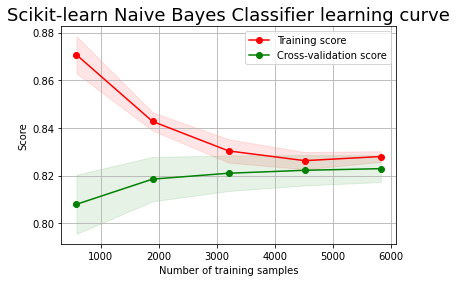

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(GaussianNB(var_smoothing=0.008), X_train, y_train, cv = 5,n_jobs = -1,shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)                                # compute mean value of scores for train set
train_scores_std = np.std(train_scores, axis=1)                                  # compute standard deviation for train set 
test_scores_mean = np.mean(test_scores, axis=1)                                  # compute mean value of scores for test set
test_scores_std = np.std(test_scores, axis=1)                                    # compute standard deviation for train set 

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")   # fill area between mean+std, mean-std
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.legend(loc="best")
plt.title("Scikit-learn Naive Bayes Classifier learning curve", fontsize=18)
plt.ylabel("Score")
plt.xlabel("Number of training samples")

####Custom with variances=1

In [ ]:
score=lib.evaluate_custom_nb_classifier(X_train,y_train,folds=5,use_unit_variance=True, smoothing=0.00001)
print("Mean score of Custom Naive Bayes Classifier with 5 cross-validation: ",score)

Scores with 5-fold cross-validation are: [0.84989719 0.85048011 0.84705075 0.84979424 0.84430727]
Mean score of Custom Naive Bayes Classifier with 5 cross-validation:  0.848305912593984


Text(0.5, 0, 'Number of training samples')

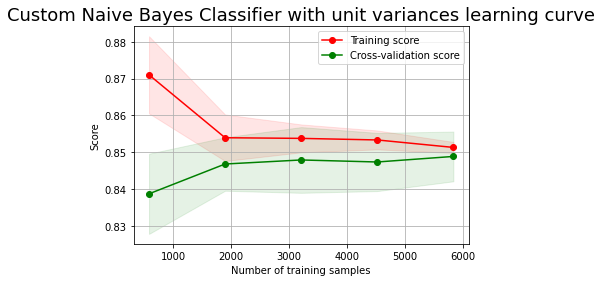

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(lib.CustomNBClassifier(use_unit_variance=True,smoothing=0.00001), X_train, y_train, cv = 5,n_jobs = -1,shuffle=True)

train_scores_mean = np.mean(train_scores, axis=1)                                # compute mean value of scores for train set
train_scores_std = np.std(train_scores, axis=1)                                  # compute standard deviation for train set 
test_scores_mean = np.mean(test_scores, axis=1)                                  # compute mean value of scores for test set
test_scores_std = np.std(test_scores, axis=1)                                    # compute standard deviation for train set 

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")   # fill area between mean+std, mean-std
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1,color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.legend(loc="best")
plt.title("Custom Naive Bayes Classifier with unit variances learning curve", fontsize=18)
plt.ylabel("Score")
plt.xlabel("Number of training samples")

##Βήμα 18

###α) Voting Classifier

In [ ]:
# initialize and train classifiers
euclidean=lib.EuclideanDistanceClassifier()
euclidean.fit(X_train,y_train)
custom_naive_bayes=lib.CustomNBClassifier(smoothing=0.0008)
custom_naive_bayes.fit(X_train,y_train)
custom_naive_bayes_unit=lib.CustomNBClassifier(True,smoothing=0.0008)
custom_naive_bayes_unit.fit(X_train,y_train)
naive_bayes=GaussianNB(var_smoothing=0.008)
naive_bayes.fit(X_train,y_train)
svm_best=svm.SVC(C= 10, gamma= 'auto', kernel= 'poly', probability=True)   # probability set to true to be used at soft voting
svm_best.fit(X_train,y_train)
svm_rbf=svm.SVC(C= 10, gamma= 'scale', kernel= 'rbf', probability=True)
svm_rbf.fit(X_train,y_train)
svm_linear=svm.SVC(C= 0.01, gamma= 'scale', kernel= 'linear', probability=True)
svm_linear.fit(X_train,y_train)
knn=KNeighborsClassifier(n_neighbors=2,weights='distance',algorithm='auto')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')

In [ ]:
def plot_confusion_matrix(cm, classes,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()  
    plt.show()



####Confusion matrices

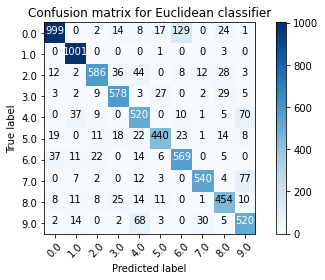

In [ ]:
matrix = confusion_matrix(y_train, euclidean.predict(X_train))
plot_confusion_matrix(matrix, list(set(y_train)), title="Confusion matrix for Euclidean classifier")

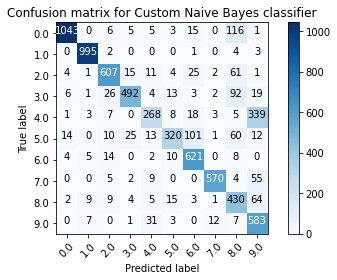

In [ ]:
matrix = confusion_matrix(y_train, custom_naive_bayes.predict(X_train))
plot_confusion_matrix(matrix, list(set(y_train)), title="Confusion matrix for Custom Naive Bayes classifier")

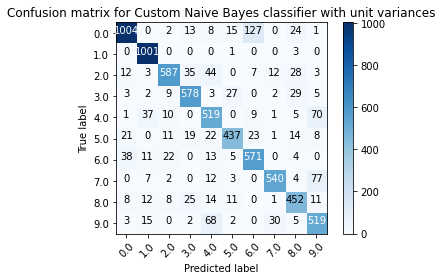

In [ ]:
matrix = confusion_matrix(y_train, custom_naive_bayes_unit.predict(X_train))
plot_confusion_matrix(matrix, list(set(y_train)), title="Confusion matrix for Custom Naive Bayes classifier with unit variances")

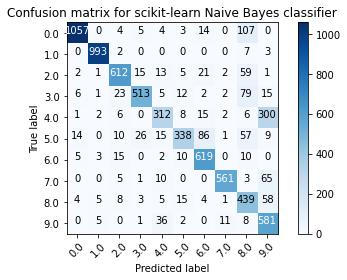

In [ ]:
matrix = confusion_matrix(y_train, naive_bayes.predict(X_train))
plot_confusion_matrix(matrix, list(set(y_train)), title="Confusion matrix for scikit-learn Naive Bayes classifier")

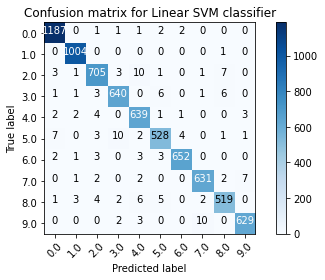

In [ ]:
matrix = confusion_matrix(y_train, svm_linear.predict(X_train))
plot_confusion_matrix(matrix, list(set(y_train)), title="Confusion matrix for Linear SVM classifier")

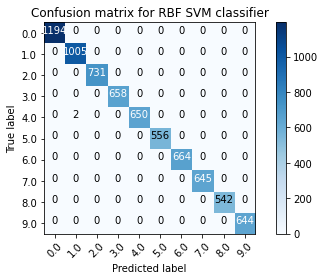

In [ ]:
matrix = confusion_matrix(y_train, svm_rbf.predict(X_train))
plot_confusion_matrix(matrix, list(set(y_train)), title="Confusion matrix for RBF SVM classifier")

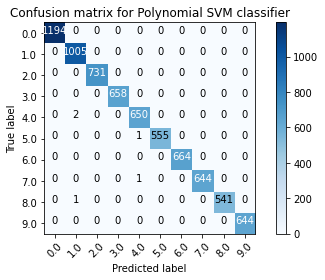

In [ ]:
matrix = confusion_matrix(y_train, svm_best.predict(X_train))
plot_confusion_matrix(matrix, list(set(y_train)), title="Confusion matrix for Polynomial SVM classifier")

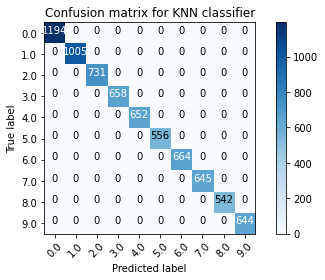

In [ ]:
matrix = confusion_matrix(y_train, knn.predict(X_train))
plot_confusion_matrix(matrix, list(set(y_train)), title="Confusion matrix for KNN classifier")

####Hard Voting Classifier with classifiers that make different errors

In [ ]:
hard_voting_classifier = VotingClassifier(estimators=[('Νaive bayes',naive_bayes), ('SVM', svm_best), ('KNN', knn)], voting = 'hard')  # initialize voting classifier with hard voting
hard_voting_classifier.fit(X_train, y_train)                        # train classifier
predictions_hard = hard_voting_classifier.predict(X_test)           # get predictions of classifier for test data  

In [ ]:
score=np.sum(y_test == predictions_hard) / y_test.shape[0]
print('Accuracy score of hard voting classifier is:', score)

Accuracy score of hard voting classifier is: 0.9466865969108121


In [ ]:
score=lib.evaluate_voting_classifier(X_test,y_test,estimators=[('Custom naive bayes',naive_bayes), ('SVM', svm_best), ('KNN', knn)],folds=5,hard_or_soft='hard')
print('Mean score of hard voting classifier with 5-fold cross-validation is: ', score)

Scores with 5-fold cross-validation are: [0.92288557 0.93034826 0.9201995  0.91022444 0.92269327]
Mean score of hard voting classifier with 5-fold cross-validation is:  0.9212702075656629


####Hard Voting Classifier with classifiers that make similar errors

In [ ]:
hard_voting_classifier = VotingClassifier(estimators=[('SVM linear',svm_linear), ('SVM', svm_best), ('SVM rbf', svm_rbf)], voting = 'hard')  # initialize voting classifier with hard voting
hard_voting_classifier.fit(X_train, y_train)                        # train classifier
predictions_hard = hard_voting_classifier.predict(X_test)           # get predictions of classifier for test data  

In [ ]:
score=np.sum(y_test == predictions_hard) / y_test.shape[0]
print('Accuracy score of hard voting classifier is:', score)

Accuracy score of hard voting classifier is: 0.9516691579471849


In [ ]:
score=lib.evaluate_voting_classifier(X_test,y_test,estimators=[('SVM linear',svm_linear), ('SVM', svm_best), ('SVM rbf', svm_rbf)],folds=5,hard_or_soft='hard')
print('Mean score of hard voting classifier with 5-fold cross-validation is: ', score)

Scores with 5-fold cross-validation are: [0.93781095 0.9278607  0.93516209 0.93017456 0.93266833]
Mean score of hard voting classifier with 5-fold cross-validation is:  0.9327353258644434


####Soft Voting Classifier with classifiers that make different errors

In [ ]:
soft_voting_classifier = VotingClassifier(estimators=[('naive bayes',naive_bayes), ('SVM', svm_best), ('KNN', knn)], voting = 'soft')  # initialize voting classifier with hard voting
soft_voting_classifier.fit(X_train, y_train)                        # train classifier
predictions_soft = soft_voting_classifier.predict(X_test)           # get predictions of classifier for test data  

In [ ]:
score=np.sum(y_test == predictions_soft) / y_test.shape[0]
print('Accuracy score of soft voting classifier is:', score)

Accuracy score of soft voting classifier is: 0.9446935724962631


In [ ]:
score=lib.evaluate_voting_classifier(X_test,y_test,estimators=[('naive bayes',naive_bayes), ('SVM', svm_best), ('KNN', knn)],folds=5,hard_or_soft='soft')
print('Mean score of soft voting classifier with 5-fold cross-validation is: ', score)

Scores with 5-fold cross-validation are: [0.91044776 0.92288557 0.9127182  0.89276808 0.92269327]
Mean score of soft voting classifier with 5-fold cross-validation is:  0.9123025768911056


####Soft Voting Classifier with classifiers that make similar errors

In [ ]:
soft_voting_classifier = VotingClassifier(estimators=[('SVM linear',svm_linear), ('SVM', svm_best), ('SVM rbf', svm_rbf)], voting = 'soft')  # initialize voting classifier with hard voting
soft_voting_classifier.fit(X_train, y_train)                        # train classifier
predictions_soft = soft_voting_classifier.predict(X_test)           # get predictions of classifier for test data  

In [ ]:
score=np.sum(y_test == predictions_soft) / y_test.shape[0]
print('Accuracy score of soft voting classifier is:', score)

Accuracy score of soft voting classifier is: 0.9516691579471849


In [ ]:
score=lib.evaluate_voting_classifier(X_test,y_test,estimators=[('SVM linear',svm_linear), ('SVM', svm_best), ('SVM rbf', svm_rbf)],folds=5,hard_or_soft='soft')
print('Mean score of soft voting classifier with 5-fold cross-validation is: ', score)

Scores with 5-fold cross-validation are: [0.93781095 0.92537313 0.93765586 0.93017456 0.93516209]
Mean score of soft voting classifier with 5-fold cross-validation is:  0.9332353196610464


###β) Bagging Classifier

#### SVM

In [ ]:
bagging_classifier=BaggingClassifier(base_estimator=svm_best,n_jobs=-1)
bagging_classifier.fit(X_train,y_train)                                       #train classifier
bag_predictions=bagging_classifier.predict(X_test)                            #get predictions of classifier for test data  

In [ ]:
score=np.sum(y_test == bag_predictions) / y_test.shape[0]
print('Accuracy score of SVM Bagging Classifier is:', score)

Accuracy score of SVM Bagging Classifier is: 0.9496761335326358


In [ ]:
score=lib.evaluate_bagging_classifier(X_test,y_test,estimators=svm_best,folds=5)
print('Mean score of svm Bagging Classifier with 5-fold cross-validation is: ', score)

Scores with 5-fold cross-validation are: [0.94278607 0.94029851 0.93765586 0.91521197 0.94264339]
Mean score of soft voting classifier with 5-fold cross-validation is:  0.935719159811913


#### Decision Tree Bagging

In [ ]:
decision_bagging = BaggingClassifier(n_jobs = -1)
decision_bagging.fit(X_train, y_train)
decision_pred = decision_bagging.predict(X_test)

In [ ]:
score=np.sum(y_test == decision_pred) / y_test.shape[0]
print('Accuracy score of Decision Tree Bagging Classifier is:', score)

Accuracy score of SVM Bagging Classifier is: 0.8858993522670653


In [ ]:
score=lib.evaluate_bagging_classifier(X_test,y_test,estimators=None,folds=5)
print('Mean score of Decision Tree Bagging Classifier with 5-fold cross-validation is: ', score)

Scores with 5-fold cross-validation are: [0.81840796 0.84825871 0.8478803  0.80548628 0.85785536]
Mean score of Decision Tree Bagging Classifier with 5-fold cross-validation is:  0.8355777223607648


# Βήμα 19

####α)

In [ ]:
class DigitDataset():
  def __init__(self, filename):
    self.data = pd.read_csv(filename, sep = " ", header = None)               # read file with name "filename"

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    sample=self.data.iloc[idx]                                                # get row with index idx
    label=sample[0]                                                           # get first value of row (label)
    features=torch.tensor(sample[1:257].values)                               # get all features of row and convert to tensor
    return(features, label)

In [ ]:
batch_size=32
# train_dataset = DigitDataset('/content/drive/My Drive/Colab Notebooks/pattern_rec/data/train.txt')   # create train data DigitDataset instance
train_dataset = DigitDataset('/content/drive/My Drive/pattern_rec/data/train.txt')   # create train data DigitDataset instance

# test_dataset = DigitDataset('/content/drive/My Drive/Colab Notebooks/pattern_rec/data/test.txt')    # create test data DigitDataset instance
test_dataset = DigitDataset('/content/drive/My Drive/pattern_rec/data/test.txt')    # create test data DigitDataset instance

train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)                # create train data Dataloader
test_dataloader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)                  # create test date Dataloader

####β)

#####2-Layer NN


In [ ]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out,activation='RELU'):
        super(TwoLayerNet,self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
        if (activation=='RELU'):
          self.activation = torch.nn.ReLU()
        else:
          self.activation = torch.nn.Sigmoid()

    def forward(self, x):

        #x = x.view(x.size(0), -1)

        x =  self.activation(self.linear1(x))

        return self.linear2(x)


Implement two layer NNs with different number of neurons and different activation functions:

In [ ]:
EPOCHS = 40
IN, H , OUT = 256, 128, 10
BATCH_SIZE = 32
LEARNING_RATE = 0.01

two_layer_net_RELU_1 = TwoLayerNet(IN, H, OUT)    # create NN with two layers, activation function: ReLU

In [ ]:
EPOCHS = 40
IN, H, OUT = 256, 32, 10
BATCH_SIZE = 32
LEARNING_RATE = 0.01

two_layer_net_RELU_2 = TwoLayerNet(IN, H, OUT)    # create NN with three layers, activation function: ReLU

In [ ]:
EPOCHS = 40
IN, H, OUT = 256, 128, 10
BATCH_SIZE = 32
LEARNING_RATE = 0.01

two_layer_net_SIGMOID_1 = TwoLayerNet(IN, H, OUT, 'SIGMOID')    # create NN with two layers, activation function: sigmoid

In [ ]:
EPOCHS = 40
IN, H, OUT = 256, 32, 10
BATCH_SIZE = 32
LEARNING_RATE = 0.01

two_layer_net_SIGMOID_2 = TwoLayerNet(IN, H, OUT, 'SIGMOID')    # create NN with two layers, activation function: sigmoid

#####3-Layer NN

In [ ]:
class ThreeLayerNet(torch.nn.Module):
    def __init__(self, D_in, H1 ,H2, D_out,activation='RELU'):
        super(ThreeLayerNet,self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H1)
        self.linear2 = torch.nn.Linear(H1, H2)
        self.linear3 = torch.nn.Linear(H2, D_out)
        if (activation=='RELU'):
          self.activation = torch.nn.ReLU()
        else:
          self.activation = torch.nn.Sigmoid()

    def forward(self, x):

        #r1 = F.relu(self.linear1(x))
        #x = F.relu(self.linear2(r1))
        hidden_1 =  self.activation(self.linear1(x))
        x = self.activation(self.linear2(hidden_1))

        # output so no dropout here
        #return F.log_softmax(self.hidden3(x))
        #return F.relu(self.hidden3(x))
        return self.linear3(x)


Implement three layer NNs with different number of neurons and different activation functions:

In [ ]:
EPOCHS = 40
IN, H1, H2 , OUT = 256, 128, 64, 10
BATCH_SIZE = 32
LEARNING_RATE = 0.01

three_layer_net_RELU_1 = ThreeLayerNet(IN, H1, H2, OUT)    # create NN with three layers, activation function: ReLU

In [ ]:
EPOCHS = 40
IN, H1, H2 , OUT = 256, 64, 32, 10
BATCH_SIZE = 32
LEARNING_RATE = 0.01

three_layer_net_RELU_2 = ThreeLayerNet(IN, H1, H2, OUT)    # create NN with three layers, activation function: ReLU

In [ ]:
EPOCHS = 40
IN, H1, H2 , OUT = 256, 128, 64, 10
BATCH_SIZE = 32
LEARNING_RATE = 0.01

three_layer_net_SIGMOID_1 = ThreeLayerNet(IN, H1, H2, OUT, 'SIGMOID')    # create NN with three layers, activation function: sigmoid

In [ ]:
EPOCHS = 40
IN, H1, H2 , OUT = 256, 64, 32, 10
BATCH_SIZE = 32
LEARNING_RATE = 0.01

three_layer_net_SIGMOID_2 = ThreeLayerNet(IN, H1, H2, OUT, 'SIGMOID')    # create NN with three layers, activation function: sigmoid

####γ)

#####Create instances of PytorchNNModels and train them:

In [ ]:

optimizer = torch.optim.SGD(two_layer_net_RELU_1.parameters(), lr = LEARNING_RATE,momentum = 0.9)                      # choose optimizer
criterion = torch.nn.CrossEntropyLoss()                                                                                # choose loss function
two_layer_model_RELU_1=lib.PytorchNNModel(two_layer_net_RELU_1,criterion,optimizer,EPOCHS,BATCH_SIZE)    # create PytorchNNModel instance
two_layer_model_RELU_1.fit(X_train,y_train)                                                                            # train NN

Epoch: 0 	 Batch: 0 	 Loss 2.3247692584991455
Epoch: 0 	 Batch: 100 	 Loss 0.878090824968744
Epoch: 1 	 Batch: 0 	 Loss 0.21292948722839355
Epoch: 1 	 Batch: 100 	 Loss 0.2274196369591916
Epoch: 2 	 Batch: 0 	 Loss 0.2604435980319977
Epoch: 2 	 Batch: 100 	 Loss 0.1680705760338224
Epoch: 3 	 Batch: 0 	 Loss 0.13703638315200806
Epoch: 3 	 Batch: 100 	 Loss 0.13362589869463798
Epoch: 4 	 Batch: 0 	 Loss 0.21432603895664215
Epoch: 4 	 Batch: 100 	 Loss 0.12279284839509147
Epoch: 5 	 Batch: 0 	 Loss 0.10528665781021118
Epoch: 5 	 Batch: 100 	 Loss 0.10040221791161169
Epoch: 6 	 Batch: 0 	 Loss 0.15126217901706696
Epoch: 6 	 Batch: 100 	 Loss 0.08178000705371989
Epoch: 7 	 Batch: 0 	 Loss 0.05210427939891815
Epoch: 7 	 Batch: 100 	 Loss 0.07497012261116859
Epoch: 8 	 Batch: 0 	 Loss 0.04302104562520981
Epoch: 8 	 Batch: 100 	 Loss 0.05883866834850742
Epoch: 9 	 Batch: 0 	 Loss 0.03913755714893341
Epoch: 9 	 Batch: 100 	 Loss 0.05227964657294278
Epoch: 10 	 Batch: 0 	 Loss 0.0138270091265439

PytorchNNModel(batch_size=32, criterion=CrossEntropyLoss(), epochs=40,
               model=TwoLayerNet(
  (linear1): Linear(in_features=256, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=10, bias=True)
  (activation): ReLU()
),
               optimizer=SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: False
    weight_decay: 0
))

In [ ]:
optimizer = torch.optim.SGD(two_layer_net_RELU_2.parameters(), lr = LEARNING_RATE,momentum = 0.9)                      # choose optimizer
criterion = torch.nn.CrossEntropyLoss()                                                                                # choose loss function
two_layer_model_RELU_2=lib.PytorchNNModel(two_layer_net_RELU_2,criterion,optimizer,EPOCHS,BATCH_SIZE)    # create PytorchNNModel instance
two_layer_model_RELU_2.fit(X_train,y_train)                                                                            # train NN

Epoch: 0 	 Batch: 0 	 Loss 2.267289638519287
Epoch: 0 	 Batch: 100 	 Loss 0.8979497619784704
Epoch: 1 	 Batch: 0 	 Loss 0.40584614872932434
Epoch: 1 	 Batch: 100 	 Loss 0.23436423815270463
Epoch: 2 	 Batch: 0 	 Loss 0.2631213665008545
Epoch: 2 	 Batch: 100 	 Loss 0.16813548504937403
Epoch: 3 	 Batch: 0 	 Loss 0.2334008663892746
Epoch: 3 	 Batch: 100 	 Loss 0.14757778353546516
Epoch: 4 	 Batch: 0 	 Loss 0.04249299317598343
Epoch: 4 	 Batch: 100 	 Loss 0.12237271819595653
Epoch: 5 	 Batch: 0 	 Loss 0.07632322609424591
Epoch: 5 	 Batch: 100 	 Loss 0.12150665946157262
Epoch: 6 	 Batch: 0 	 Loss 0.05627885460853577
Epoch: 6 	 Batch: 100 	 Loss 0.10633200397807183
Epoch: 7 	 Batch: 0 	 Loss 0.1157616525888443
Epoch: 7 	 Batch: 100 	 Loss 0.08770006338115965
Epoch: 8 	 Batch: 0 	 Loss 0.1901225745677948
Epoch: 8 	 Batch: 100 	 Loss 0.07129955194466332
Epoch: 9 	 Batch: 0 	 Loss 0.09892336279153824
Epoch: 9 	 Batch: 100 	 Loss 0.0707514026469671
Epoch: 10 	 Batch: 0 	 Loss 0.030667025595903397

PytorchNNModel(batch_size=32, criterion=CrossEntropyLoss(), epochs=40,
               model=TwoLayerNet(
  (linear1): Linear(in_features=256, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
  (activation): ReLU()
),
               optimizer=SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: False
    weight_decay: 0
))

In [ ]:
optimizer = torch.optim.SGD(two_layer_net_SIGMOID_1.parameters(), lr = LEARNING_RATE,momentum = 0.9)                         # choose optimizer
criterion = torch.nn.CrossEntropyLoss()                                                                                      # choose loss function
two_layer_model_SIGMOID_1=lib.PytorchNNModel(two_layer_net_SIGMOID_1,criterion,optimizer,EPOCHS,BATCH_SIZE)    # create PytorchNNModel instance
two_layer_model_SIGMOID_1.fit(X_train,y_train)                                                                               # train NN

Epoch: 0 	 Batch: 0 	 Loss 2.313267469406128
Epoch: 0 	 Batch: 100 	 Loss 1.772574495561052
Epoch: 1 	 Batch: 0 	 Loss 0.6528455018997192
Epoch: 1 	 Batch: 100 	 Loss 0.6137075949423384
Epoch: 2 	 Batch: 0 	 Loss 0.44704386591911316
Epoch: 2 	 Batch: 100 	 Loss 0.36051198943416674
Epoch: 3 	 Batch: 0 	 Loss 0.19108730554580688
Epoch: 3 	 Batch: 100 	 Loss 0.28740067661988855
Epoch: 4 	 Batch: 0 	 Loss 0.38710689544677734
Epoch: 4 	 Batch: 100 	 Loss 0.2446827045319104
Epoch: 5 	 Batch: 0 	 Loss 0.13282127678394318
Epoch: 5 	 Batch: 100 	 Loss 0.22750254986014698
Epoch: 6 	 Batch: 0 	 Loss 0.19262893497943878
Epoch: 6 	 Batch: 100 	 Loss 0.20976629174581848
Epoch: 7 	 Batch: 0 	 Loss 0.3762109577655792
Epoch: 7 	 Batch: 100 	 Loss 0.1881367517358596
Epoch: 8 	 Batch: 0 	 Loss 0.30062857270240784
Epoch: 8 	 Batch: 100 	 Loss 0.17999476024715028
Epoch: 9 	 Batch: 0 	 Loss 0.1937706172466278
Epoch: 9 	 Batch: 100 	 Loss 0.1687727909867126
Epoch: 10 	 Batch: 0 	 Loss 0.10965164005756378
Epo

PytorchNNModel(batch_size=32, criterion=CrossEntropyLoss(), epochs=40,
               model=TwoLayerNet(
  (linear1): Linear(in_features=256, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=10, bias=True)
  (activation): Sigmoid()
),
               optimizer=SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: False
    weight_decay: 0
))

In [ ]:
optimizer = torch.optim.SGD(two_layer_net_SIGMOID_2.parameters(), lr = LEARNING_RATE,momentum = 0.9)                         # choose optimizer
criterion = torch.nn.CrossEntropyLoss()                                                                                      # choose loss function
two_layer_model_SIGMOID_2=lib.PytorchNNModel(two_layer_net_SIGMOID_2,criterion,optimizer,EPOCHS,BATCH_SIZE)    # create PytorchNNModel instance
two_layer_model_SIGMOID_2.fit(X_train,y_train)                                                                               # train NN

Epoch: 0 	 Batch: 0 	 Loss 2.399308204650879
Epoch: 0 	 Batch: 100 	 Loss 1.9440872527585171
Epoch: 1 	 Batch: 0 	 Loss 1.2838687896728516
Epoch: 1 	 Batch: 100 	 Loss 0.8891965994740477
Epoch: 2 	 Batch: 0 	 Loss 0.6311895251274109
Epoch: 2 	 Batch: 100 	 Loss 0.5054807872465341
Epoch: 3 	 Batch: 0 	 Loss 0.3422679305076599
Epoch: 3 	 Batch: 100 	 Loss 0.3693942362719243
Epoch: 4 	 Batch: 0 	 Loss 0.36564043164253235
Epoch: 4 	 Batch: 100 	 Loss 0.2991667214301553
Epoch: 5 	 Batch: 0 	 Loss 0.17683875560760498
Epoch: 5 	 Batch: 100 	 Loss 0.2649328597258813
Epoch: 6 	 Batch: 0 	 Loss 0.2640450894832611
Epoch: 6 	 Batch: 100 	 Loss 0.22791166684710154
Epoch: 7 	 Batch: 0 	 Loss 0.18334297835826874
Epoch: 7 	 Batch: 100 	 Loss 0.2138189356958512
Epoch: 8 	 Batch: 0 	 Loss 0.05130630359053612
Epoch: 8 	 Batch: 100 	 Loss 0.2009790959113305
Epoch: 9 	 Batch: 0 	 Loss 0.10483913868665695
Epoch: 9 	 Batch: 100 	 Loss 0.18969218543555477
Epoch: 10 	 Batch: 0 	 Loss 0.07490810006856918
Epoch:

PytorchNNModel(batch_size=32, criterion=CrossEntropyLoss(), epochs=40,
               model=TwoLayerNet(
  (linear1): Linear(in_features=256, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
  (activation): Sigmoid()
),
               optimizer=SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: False
    weight_decay: 0
))

In [ ]:
optimizer = torch.optim.SGD(three_layer_net_RELU_1.parameters(), lr = LEARNING_RATE,momentum = 0.9)                         # choose optimizer
criterion = torch.nn.CrossEntropyLoss()                                                                                     # choose loss function
three_layer_model_RELU_1=lib.PytorchNNModel(three_layer_net_RELU_1,criterion,optimizer,EPOCHS,BATCH_SIZE)     # create PytorchNNModel instance
three_layer_model_RELU_1.fit(X_train,y_train)                                                                               # train NN

Epoch: 0 	 Batch: 0 	 Loss 2.3094468116760254
Epoch: 0 	 Batch: 100 	 Loss 1.4060934035494776
Epoch: 1 	 Batch: 0 	 Loss 0.215860515832901
Epoch: 1 	 Batch: 100 	 Loss 0.24039580466428606
Epoch: 2 	 Batch: 0 	 Loss 0.3479441702365875
Epoch: 2 	 Batch: 100 	 Loss 0.1596110295135491
Epoch: 3 	 Batch: 0 	 Loss 0.13590306043624878
Epoch: 3 	 Batch: 100 	 Loss 0.11959933853791196
Epoch: 4 	 Batch: 0 	 Loss 0.12018151581287384
Epoch: 4 	 Batch: 100 	 Loss 0.10407948690365151
Epoch: 5 	 Batch: 0 	 Loss 0.047530729323625565
Epoch: 5 	 Batch: 100 	 Loss 0.07498609483942832
Epoch: 6 	 Batch: 0 	 Loss 0.009056542068719864
Epoch: 6 	 Batch: 100 	 Loss 0.06401304672426074
Epoch: 7 	 Batch: 0 	 Loss 0.3037109375
Epoch: 7 	 Batch: 100 	 Loss 0.05383216081611296
Epoch: 8 	 Batch: 0 	 Loss 0.018322467803955078
Epoch: 8 	 Batch: 100 	 Loss 0.04078687133848446
Epoch: 9 	 Batch: 0 	 Loss 0.0168237816542387
Epoch: 9 	 Batch: 100 	 Loss 0.027815066146581333
Epoch: 10 	 Batch: 0 	 Loss 0.005853078793734312
E

PytorchNNModel(batch_size=32, criterion=CrossEntropyLoss(), epochs=40,
               model=ThreeLayerNet(
  (linear1): Linear(in_features=256, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (activation): ReLU()
),
               optimizer=SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: False
    weight_decay: 0
))

In [ ]:
optimizer = torch.optim.SGD(three_layer_net_RELU_2.parameters(), lr = LEARNING_RATE,momentum = 0.9)                         # choose optimizer
criterion = torch.nn.CrossEntropyLoss()                                                                                     # choose loss function
three_layer_model_RELU_2=lib.PytorchNNModel(three_layer_net_RELU_2,criterion,optimizer,EPOCHS,BATCH_SIZE)     # create PytorchNNModel instance
three_layer_model_RELU_2.fit(X_train,y_train)                                                                               # train NN

Epoch: 0 	 Batch: 0 	 Loss 2.305889368057251
Epoch: 0 	 Batch: 100 	 Loss 1.5690544548601206
Epoch: 1 	 Batch: 0 	 Loss 0.7405421733856201
Epoch: 1 	 Batch: 100 	 Loss 0.3023431387425649
Epoch: 2 	 Batch: 0 	 Loss 0.1414133906364441
Epoch: 2 	 Batch: 100 	 Loss 0.18990566587020266
Epoch: 3 	 Batch: 0 	 Loss 0.19142493605613708
Epoch: 3 	 Batch: 100 	 Loss 0.14494263358635479
Epoch: 4 	 Batch: 0 	 Loss 0.11669459939002991
Epoch: 4 	 Batch: 100 	 Loss 0.11350761773525783
Epoch: 5 	 Batch: 0 	 Loss 0.4674883186817169
Epoch: 5 	 Batch: 100 	 Loss 0.09237507334218757
Epoch: 6 	 Batch: 0 	 Loss 0.04074571281671524
Epoch: 6 	 Batch: 100 	 Loss 0.07706376616059259
Epoch: 7 	 Batch: 0 	 Loss 0.022926978766918182
Epoch: 7 	 Batch: 100 	 Loss 0.06024455296631792
Epoch: 8 	 Batch: 0 	 Loss 0.046168141067028046
Epoch: 8 	 Batch: 100 	 Loss 0.04925112074960281
Epoch: 9 	 Batch: 0 	 Loss 0.03781663253903389
Epoch: 9 	 Batch: 100 	 Loss 0.04601960909543651
Epoch: 10 	 Batch: 0 	 Loss 0.115367166697978

PytorchNNModel(batch_size=32, criterion=CrossEntropyLoss(), epochs=40,
               model=ThreeLayerNet(
  (linear1): Linear(in_features=256, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=10, bias=True)
  (activation): ReLU()
),
               optimizer=SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: False
    weight_decay: 0
))

In [ ]:
optimizer = torch.optim.SGD(three_layer_net_SIGMOID_1.parameters(), lr = LEARNING_RATE,momentum = 0.9)                            # choose optimizer
criterion = torch.nn.CrossEntropyLoss()                                                                                           # choose loss function
three_layer_model_SIGMOID_1=lib.PytorchNNModel(three_layer_net_SIGMOID_1,criterion,optimizer,EPOCHS,BATCH_SIZE)     # create PytorchNNModel instance
three_layer_model_SIGMOID_1.fit(X_train,y_train)                                                                                  # train NN

Epoch: 0 	 Batch: 0 	 Loss 2.3572888374328613
Epoch: 0 	 Batch: 100 	 Loss 2.2724082942056185
Epoch: 1 	 Batch: 0 	 Loss 2.1684682369232178
Epoch: 1 	 Batch: 100 	 Loss 2.1096394038436435
Epoch: 2 	 Batch: 0 	 Loss 1.868995189666748
Epoch: 2 	 Batch: 100 	 Loss 1.5969761692651427
Epoch: 3 	 Batch: 0 	 Loss 1.4127132892608643
Epoch: 3 	 Batch: 100 	 Loss 1.1940281326227848
Epoch: 4 	 Batch: 0 	 Loss 1.0637094974517822
Epoch: 4 	 Batch: 100 	 Loss 0.8966404736632168
Epoch: 5 	 Batch: 0 	 Loss 0.6241600513458252
Epoch: 5 	 Batch: 100 	 Loss 0.6820458020314132
Epoch: 6 	 Batch: 0 	 Loss 0.42035722732543945
Epoch: 6 	 Batch: 100 	 Loss 0.5389515196922983
Epoch: 7 	 Batch: 0 	 Loss 0.8630309700965881
Epoch: 7 	 Batch: 100 	 Loss 0.4185114247669088
Epoch: 8 	 Batch: 0 	 Loss 0.28518038988113403
Epoch: 8 	 Batch: 100 	 Loss 0.35332419819170885
Epoch: 9 	 Batch: 0 	 Loss 0.45821085572242737
Epoch: 9 	 Batch: 100 	 Loss 0.3032222769343027
Epoch: 10 	 Batch: 0 	 Loss 0.28169357776641846
Epoch: 10

PytorchNNModel(batch_size=32, criterion=CrossEntropyLoss(), epochs=40,
               model=ThreeLayerNet(
  (linear1): Linear(in_features=256, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
  (activation): Sigmoid()
),
               optimizer=SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: False
    weight_decay: 0
))

In [ ]:
optimizer = torch.optim.SGD(three_layer_net_SIGMOID_2.parameters(), lr = LEARNING_RATE,momentum = 0.9)                            # choose optimizer
criterion = torch.nn.CrossEntropyLoss()                                                                                           # choose loss function
three_layer_model_SIGMOID_2=lib.PytorchNNModel(three_layer_net_SIGMOID_2,criterion,optimizer,EPOCHS,BATCH_SIZE)     # create PytorchNNModel instance
three_layer_model_SIGMOID_2.fit(X_train,y_train)                                                                                  # train NN

Epoch: 0 	 Batch: 0 	 Loss 2.3904757499694824
Epoch: 0 	 Batch: 100 	 Loss 2.2749794308501894
Epoch: 1 	 Batch: 0 	 Loss 2.1259844303131104
Epoch: 1 	 Batch: 100 	 Loss 2.1576969352098976
Epoch: 2 	 Batch: 0 	 Loss 1.872548222541809
Epoch: 2 	 Batch: 100 	 Loss 1.7767096214955396
Epoch: 3 	 Batch: 0 	 Loss 1.537747859954834
Epoch: 3 	 Batch: 100 	 Loss 1.4282758365763295
Epoch: 4 	 Batch: 0 	 Loss 1.3068310022354126
Epoch: 4 	 Batch: 100 	 Loss 1.0753369360867113
Epoch: 5 	 Batch: 0 	 Loss 0.9914708733558655
Epoch: 5 	 Batch: 100 	 Loss 0.8585618067495894
Epoch: 6 	 Batch: 0 	 Loss 0.6150064468383789
Epoch: 6 	 Batch: 100 	 Loss 0.6911670046277566
Epoch: 7 	 Batch: 0 	 Loss 0.5148252844810486
Epoch: 7 	 Batch: 100 	 Loss 0.5481812647073576
Epoch: 8 	 Batch: 0 	 Loss 0.4514022171497345
Epoch: 8 	 Batch: 100 	 Loss 0.44953977707589027
Epoch: 9 	 Batch: 0 	 Loss 0.7075777053833008
Epoch: 9 	 Batch: 100 	 Loss 0.37686591071657616
Epoch: 10 	 Batch: 0 	 Loss 0.2207712084054947
Epoch: 10 	 B

PytorchNNModel(batch_size=32, criterion=CrossEntropyLoss(), epochs=40,
               model=ThreeLayerNet(
  (linear1): Linear(in_features=256, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=32, bias=True)
  (linear3): Linear(in_features=32, out_features=10, bias=True)
  (activation): Sigmoid()
),
               optimizer=SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0.9
    nesterov: False
    weight_decay: 0
))

#####Evaluate NNs on train and validation data:

In [ ]:
val_dataloader = DataLoader(two_layer_model_RELU_1.validation_dataset, batch_size =1, shuffle = False)  # create validation data Dataloader from validation set of NN
X_val=np.zeros((len(two_layer_model_RELU_1.validation_dataset),256))                                                     # table of features 
y_val=np.zeros((len(two_layer_model_RELU_1.validation_dataset)))                                                         # table of labels
for i,(features,label) in enumerate(val_dataloader):                                                    # get data from valudation Dataloader into numpy array
  X_val[i,:]=np.array(features)
  y_val[i]=float(label)

training_score=two_layer_model_RELU_1.score(X_train,y_train)
val_score=two_layer_model_RELU_1.score(X_val,y_val)
print('Score on train data for two layer NN: ', training_score)
print('Score on validation data for two layer NN: ', val_score)

Score on train data for two layer NN:  0.9909477437937183
Score on validation data for two layer NN:  0.970292504570384


In [ ]:
val_dataloader = DataLoader(two_layer_model_RELU_2.validation_dataset, batch_size =1, shuffle = False)  # create validation data Dataloader from validation set of NN
X_val=np.zeros((len(two_layer_model_RELU_2.validation_dataset),256))                                                     # table of features 
y_val=np.zeros((len(two_layer_model_RELU_2.validation_dataset)))                                                         # table of labels
for i,(features,label) in enumerate(val_dataloader):                                                    # get data from valudation Dataloader into numpy array
  X_val[i,:]=np.array(features)
  y_val[i]=float(label)

training_score=two_layer_model_RELU_2.score(X_train,y_train)
val_score=two_layer_model_RELU_2.score(X_val,y_val)
print('Score on train data for two layer NN: ', training_score)
print('Score on validation data for two layer NN: ', val_score)

Score on train data for two layer NN:  0.9864216156905774
Score on validation data for two layer NN:  0.956581352833638


In [ ]:
val_dataloader = DataLoader(two_layer_model_SIGMOID_1.validation_dataset, batch_size =1, shuffle = False)  # create validation data Dataloader from validation set of NN
X_val=np.zeros((len(two_layer_model_SIGMOID_1.validation_dataset),256))                                                        # table of features 
y_val=np.zeros((len(two_layer_model_SIGMOID_1.validation_dataset)))                                                            # table of labels
for i,(features,label) in enumerate(val_dataloader):                                                       # get data from valudation Dataloader into numpy array
  X_val[i,:]=np.array(features)
  y_val[i]=float(label)

training_score=two_layer_model_SIGMOID_1.score(X_train,y_train)
val_score=two_layer_model_SIGMOID_1.score(X_val,y_val)
print('Score on train data for two layer NN: ', training_score)
print('Score on validation data for two layer NN: ', val_score)

Score on train data for two layer NN:  0.9773693594842957
Score on validation data for two layer NN:  0.953382084095064


In [ ]:
val_dataloader = DataLoader(two_layer_model_SIGMOID_2.validation_dataset, batch_size =1, shuffle = False)  # create validation data Dataloader from validation set of NN
X_val=np.zeros((len(two_layer_model_SIGMOID_2.validation_dataset),256))                                                        # table of features 
y_val=np.zeros((len(two_layer_model_SIGMOID_2.validation_dataset)))                                                            # table of labels
for i,(features,label) in enumerate(val_dataloader):                                                       # get data from valudation Dataloader into numpy array
  X_val[i,:]=np.array(features)
  y_val[i]=float(label)

training_score=two_layer_model_SIGMOID_2.score(X_train,y_train)
val_score=two_layer_model_SIGMOID_2.score(X_val,y_val)
print('Score on train data for two layer NN: ', training_score)
print('Score on validation data for two layer NN: ', val_score)

Score on train data for two layer NN:  0.9812097106021122
Score on validation data for two layer NN:  0.9634369287020109


In [ ]:
val_dataloader = DataLoader(three_layer_model_RELU_1.validation_dataset, batch_size =1, shuffle = False)   # create validation data Dataloader from validation set of NN
X_val=np.zeros((len(three_layer_model_RELU_1.validation_dataset),256))                                                        # table of features 
y_val=np.zeros((len(three_layer_model_RELU_1.validation_dataset)))                                                            # table of labels
for i,(features,label) in enumerate(val_dataloader):                                                       # get data from valudation Dataloader into numpy array
  X_val[i,:]=np.array(features)
  y_val[i]=float(label)

training_score=three_layer_model_RELU_1.score(X_train,y_train)
val_score=three_layer_model_RELU_1.score(X_val,y_val)
print('Score on train data for three layer NN: ', training_score)
print('Score on validation data for three layer NN: ', val_score)

Score on train data for three layer NN:  0.9898505006171993
Score on validation data for three layer NN:  0.966636197440585


In [ ]:
val_dataloader = DataLoader(three_layer_model_RELU_2.validation_dataset, batch_size =1, shuffle = False)   # create validation data Dataloader from validation set of NN
X_val=np.zeros((len(three_layer_model_RELU_2.validation_dataset),256))                                                        # table of features 
y_val=np.zeros((len(three_layer_model_RELU_2.validation_dataset)))                                                            # table of labels
for i,(features,label) in enumerate(val_dataloader):                                                       # get data from valudation Dataloader into numpy array
  X_val[i,:]=np.array(features)
  y_val[i]=float(label)

training_score=three_layer_model_RELU_2.score(X_train,y_train)
val_score=three_layer_model_RELU_2.score(X_val,y_val)
print('Score on train data for three layer NN: ', training_score)
print('Score on validation data for three layer NN: ', val_score)

Score on train data for three layer NN:  0.9883417912494856
Score on validation data for three layer NN:  0.9611517367458866


In [ ]:
val_dataloader = DataLoader(three_layer_model_SIGMOID_1.validation_dataset, batch_size =1, shuffle = False)   # create validation data Dataloader from validation set of NN
X_val=np.zeros((len(three_layer_model_SIGMOID_1.validation_dataset),256))                                                           # table of features 
y_val=np.zeros((len(three_layer_model_SIGMOID_1.validation_dataset)))                                                               # table of labels
for i,(features,label) in enumerate(val_dataloader):                                                          # get data from valudation Dataloader into numpy array
  X_val[i,:]=np.array(features)
  y_val[i]=float(label)

training_score=three_layer_model_SIGMOID_1.score(X_train,y_train)
val_score=three_layer_model_SIGMOID_1.score(X_val,y_val)
print('Score on train data for three layer NN: ', training_score)
print('Score on validation data for three layer NN: ', val_score)

Score on train data for three layer NN:  0.9717459882046359
Score on validation data for three layer NN:  0.9492687385740403


In [ ]:
val_dataloader = DataLoader(three_layer_model_SIGMOID_2.validation_dataset, batch_size =1, shuffle = False)   # create validation data Dataloader from validation set of NN
X_val=np.zeros((len(three_layer_model_SIGMOID_2.validation_dataset),256))                                                           # table of features 
y_val=np.zeros((len(three_layer_model_SIGMOID_2.validation_dataset)))                                                               # table of labels
for i,(features,label) in enumerate(val_dataloader):                                                          # get data from valudation Dataloader into numpy array
  X_val[i,:]=np.array(features)
  y_val[i]=float(label)

training_score=three_layer_model_SIGMOID_2.score(X_train,y_train)
val_score=three_layer_model_SIGMOID_2.score(X_val,y_val)
print('Score on train data for three layer NN: ', training_score)
print('Score on validation data for three layer NN: ', val_score)

Score on train data for three layer NN:  0.97270607598409
Score on validation data for three layer NN:  0.946983546617916


####δ)

Evaluate on test data:

In [ ]:
test_score=two_layer_model_RELU_1.score(X_test,y_test)
print('Score on test data for first two layer NN with ReLU activation function: ', test_score)
test_score=two_layer_model_RELU_2.score(X_test,y_test)
print('Score on test data for second two layer NN with ReLU activation function: ', test_score)
test_score=two_layer_model_SIGMOID_1.score(X_test,y_test)
print('Score on test data for first two layer NN with sigmoid activation function: ', test_score)
test_score=two_layer_model_SIGMOID_2.score(X_test,y_test)
print('Score on test data for second two layer NN with sigmoid activation function: ', test_score)
test_score=three_layer_model_RELU_1.score(X_test,y_test)
print('Score on test data for first three layer NN with ReLU activation function: ', test_score)
test_score=three_layer_model_RELU_2.score(X_test,y_test)
print('Score on test data for second three layer NN with ReLU activation function: ', test_score)
test_score=three_layer_model_SIGMOID_1.score(X_test,y_test)
print('Score on test data for first three layer NN with sigmoid activation function: ', test_score)
test_score=three_layer_model_SIGMOID_2.score(X_test,y_test)
print('Score on test data for second three layer NN with sigmoid activation function: ', test_score)

Score on test data for first two layer NN with ReLU activation function:  0.9367214748380668
Score on test data for second two layer NN with ReLU activation function:  0.929745889387145
Score on test data for first two layer NN with sigmoid activation function:  0.9217737917289487
Score on test data for second two layer NN with sigmoid activation function:  0.9207772795216741
Score on test data for first three layer NN with ReLU activation function:  0.931738913801694
Score on test data for second three layer NN with ReLU activation function:  0.9307424015944196
Score on test data for first three layer NN with sigmoid activation function:  0.9162929745889388
Score on test data for second three layer NN with sigmoid activation function:  0.918784255107125
